In [21]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [22]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
data = Path('Resources\lending_data.csv')
df = pd.read_csv(data)
# Review the DataFrame
df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [23]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = df["loan_status"]

# Separate the X variable, the features
X = df.drop(columns="loan_status")

In [24]:
# Review the y variable Series
y.head()

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [25]:
# Review the X variable DataFrame
X.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [26]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [27]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=1)

# Fit the model using training data
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [28]:
# Make a prediction using the testing data
predictions = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head(10)

,Prediction,Actual
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

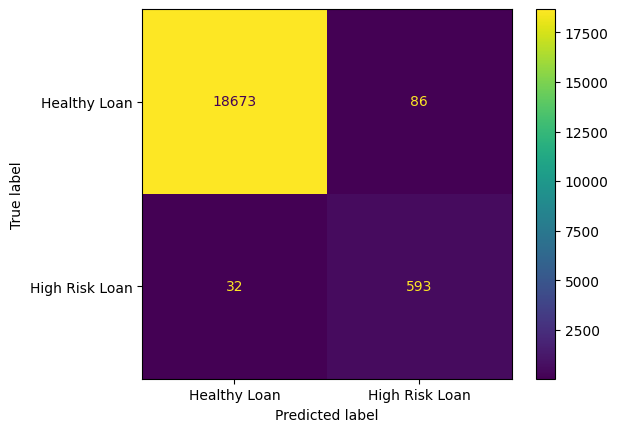

In [29]:
# Generate a confusion matrix for the model
target_names = ["Healthy Loan", "High Risk Loan"]
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot()
plt.show()

In [30]:
# Print the classification report for the model
print(classification_report(y_test, predictions, target_names=target_names))

                precision    recall  f1-score   support

  Healthy Loan       1.00      1.00      1.00     18759
High Risk Loan       0.87      0.95      0.91       625

      accuracy                           0.99     19384
     macro avg       0.94      0.97      0.95     19384
  weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** It is definitely better at predicting the "Healthy Loans." The model mislabeledless than half of a percent of them as "High-Risk Loans" and had an even better recall. However, it is less pricise when labeling those high risk loans, mislabeling 13% of them as high risk when they were actually healthy and mistaking 5% of the high risk loans as healthy. Overall though, since this model is so accurate for healthy loans, which is the largest portion of your loans, I would reccomend this for any bank to use. 

---